# Plot and explore datasets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from ts_inverse.datahandler import get_datasets

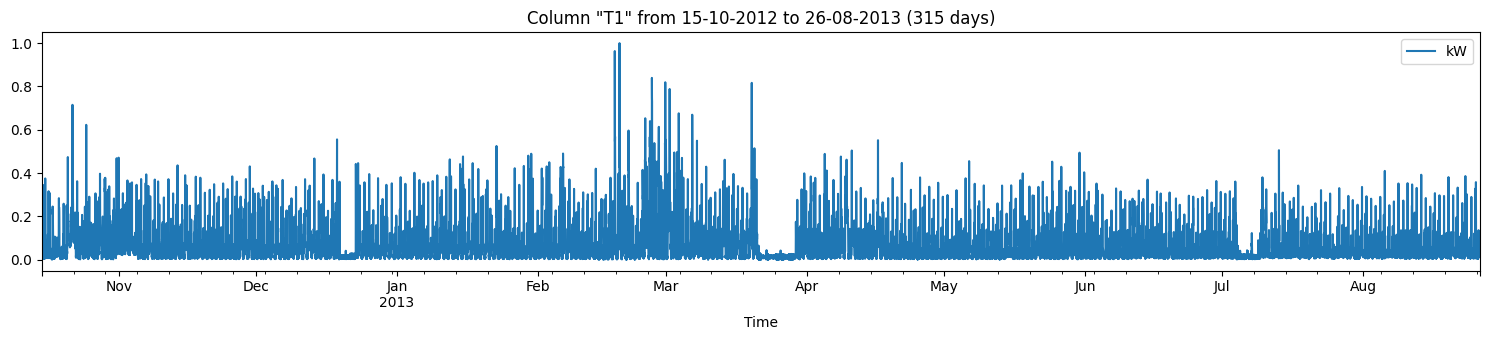

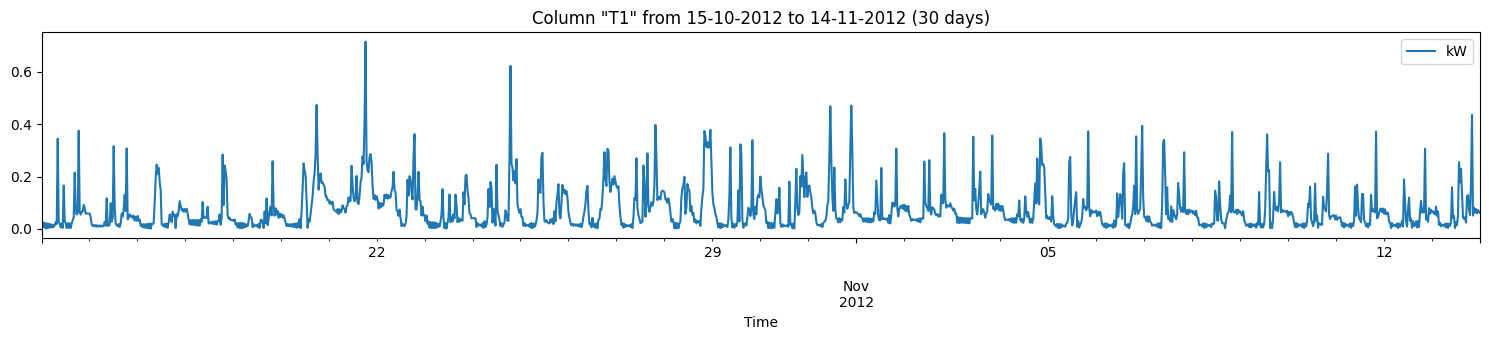

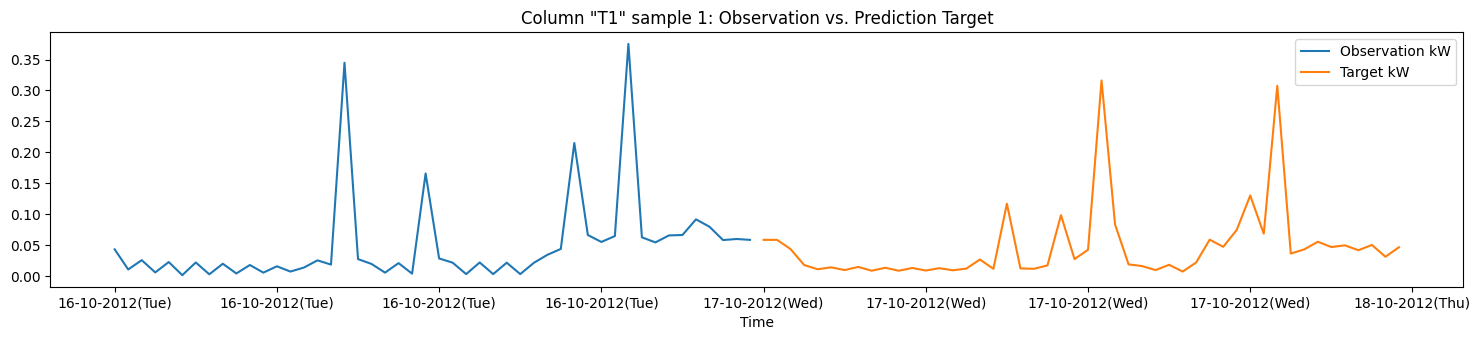

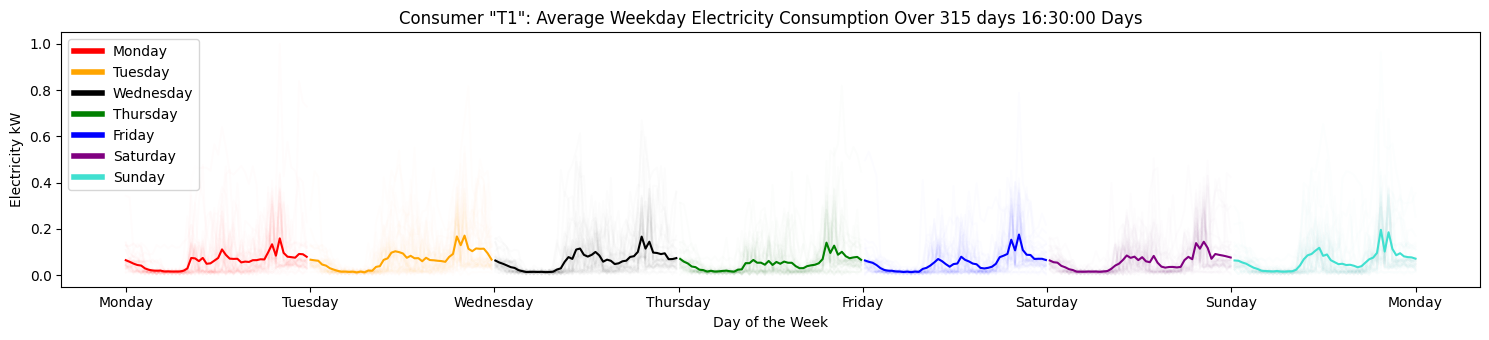

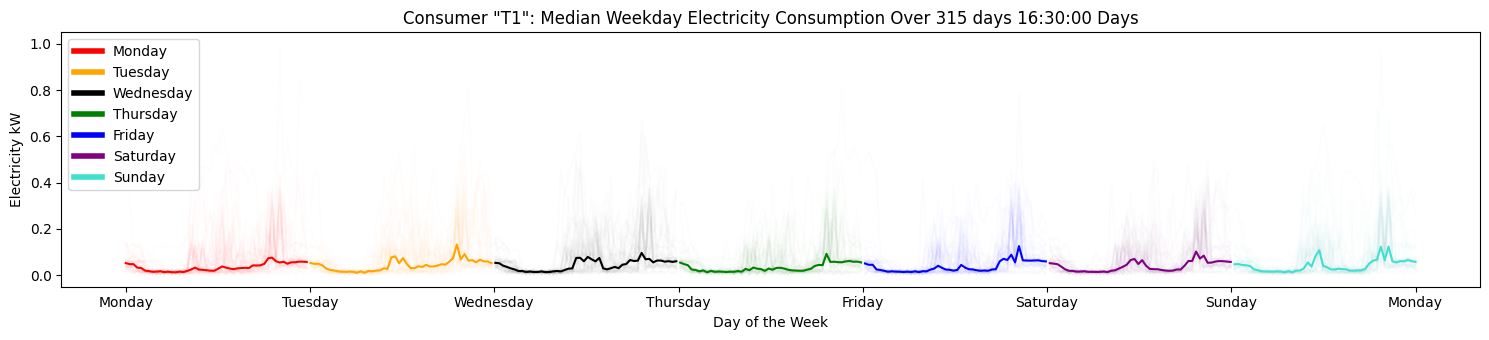

In [2]:
def plot_first_n_columns(df, n=5, start_date=None, end_date=None):
    for i, column in enumerate(df.columns):
        print(column)
        if i == n:
            break

        if start_date is not None and end_date is not None:
            start_date = datetime.datetime(2012, 11, 1)
            end_date = start_date + datetime.timedelta(days=30)
            selected_data = df[column][start_date:end_date]
        else:
            selected_data = df[column]

        plt.figure()
        selected_data.plot(figsize=(20,5))
        plt.title(column)
        plt.show()

df_london_smartmeter = pd.read_csv("./LondonSmartMeter/london_smart_meters_dataset_without_missing_values_first_30_consumers.csv", index_col='Time', parse_dates=['Time'])
lsm_train_datasets, lsm_val_datasets, lsm_test_datasets = get_datasets("london_smartmeter", normalize='minmax', columns=df_london_smartmeter.columns[:1], train_stride=24, observation_days=1, future_days=1, validation_stride=24)
save_path = "../out/01_data_exploration/london_smartmeter_column1"
for train_set in lsm_train_datasets:
    train_set.plot_series(save_fig=save_path+"_all.png")
    train_set.plot_series(duration=datetime.timedelta(days=30), save_fig=save_path+"_month1.png")
    train_set.plot(1, features=[0], save_fig=save_path+"_sample1.png")
    train_set.plot_weekly_load_profile(verbose=True, save_fig=save_path+"_profile_average.png")
    train_set.plot_weekly_load_profile(verbose=True, median_instead_of_average=True, save_fig=save_path+"_profile_median.png")

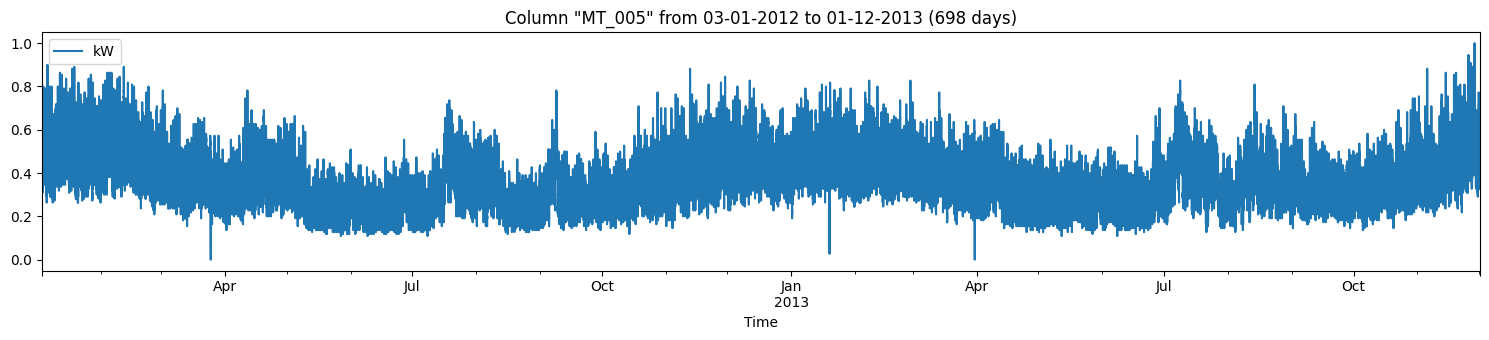

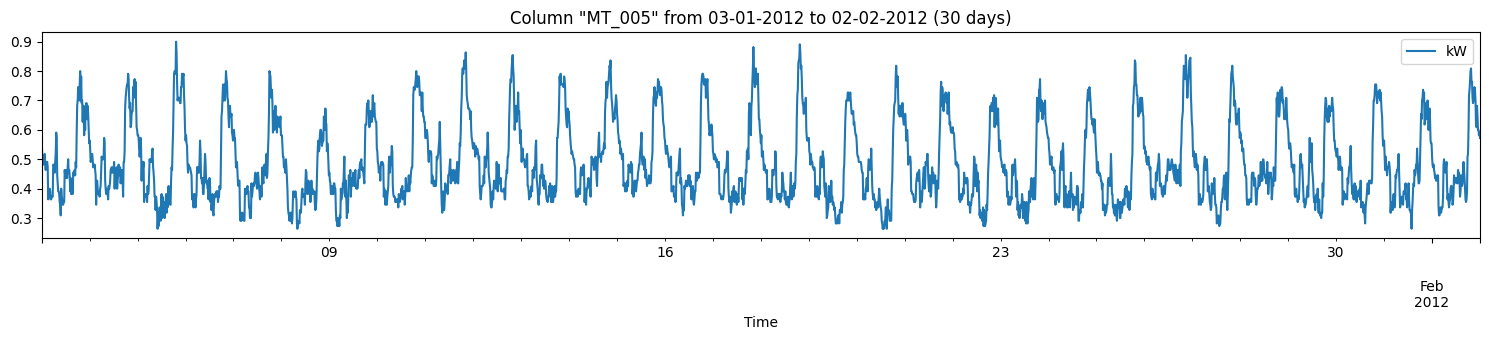

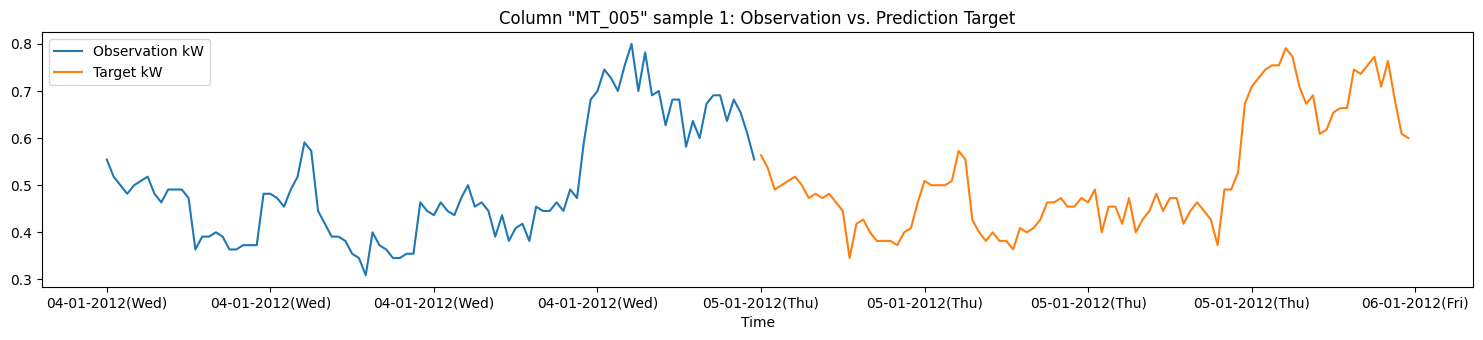

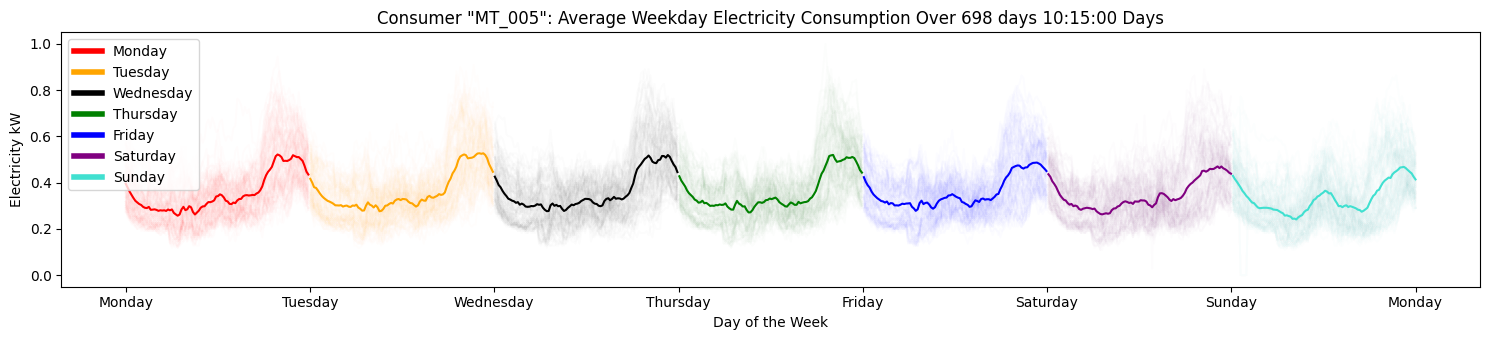

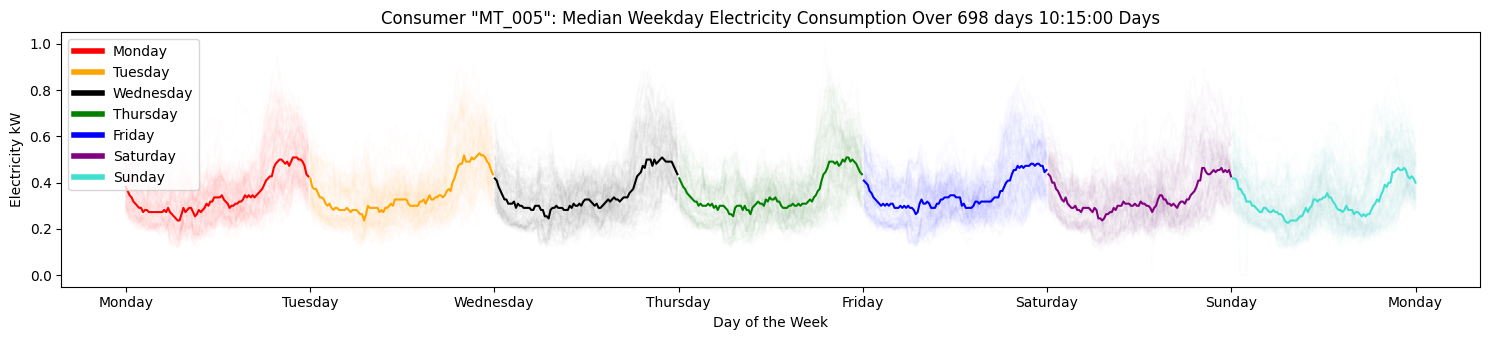

In [3]:
df_electricity_370 = pd.read_csv("./Electricity370/LD2011_2014_first_40_consumers.csv", index_col='Time', parse_dates=['Time'])
# plot_first_n_columns(df_electricity_370, 5)
electricity_370_train_datasets, electricity_370_val_datasets, electricity_370_test_datasets = get_datasets("electricity_370", normalize='minmax', columns=df_electricity_370.columns[4:5], train_stride=24, observation_days=1, future_days=1, validation_stride=24, should_dropna=False)
save_path = "../out/01_data_exploration/electricity_370_column5"
for train_set in electricity_370_train_datasets:
    train_set.plot_series(save_fig=save_path+"_all.png")
    train_set.plot_series(duration=datetime.timedelta(days=30), save_fig=save_path+"_month1.png")
    train_set.plot(1, features=[0], save_fig=save_path+"_sample1.png")
    train_set.plot_weekly_load_profile(verbose=True, save_fig=save_path+"_profile_average.png")
    train_set.plot_weekly_load_profile(verbose=True, median_instead_of_average=True, save_fig=save_path+"_profile_median.png")

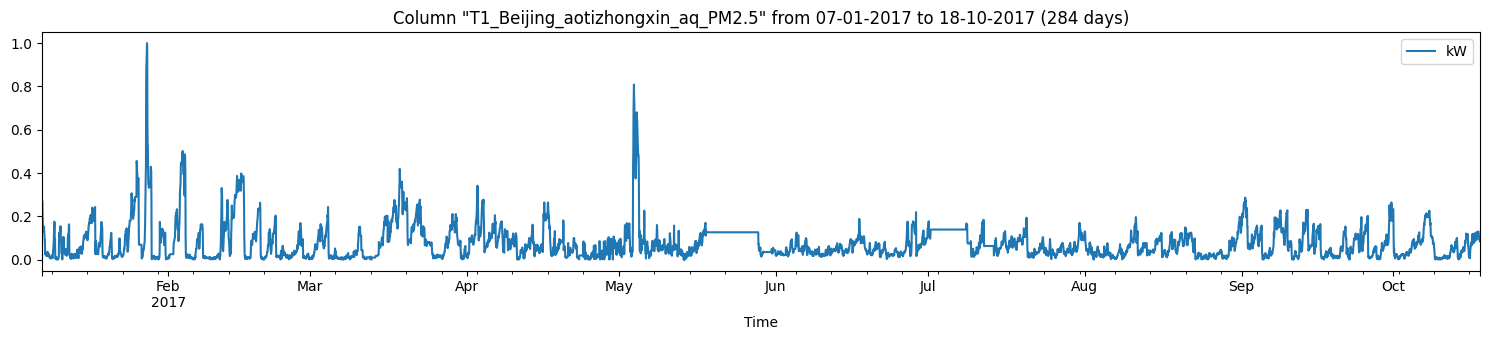

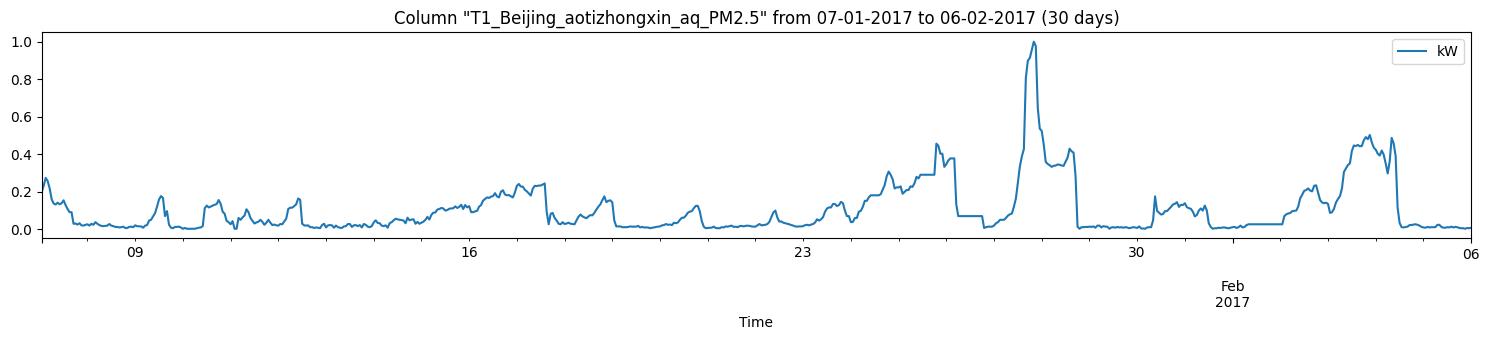

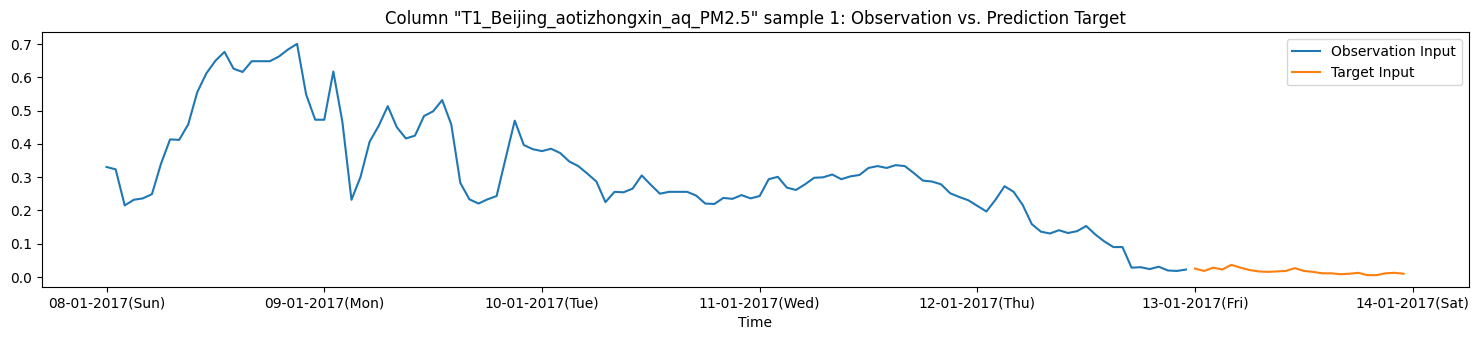

In [4]:
df_kddcup = pd.read_csv("./KDDCup_2018/kdd_cup_2018_dataset_without_missing_values.csv", index_col='Time', parse_dates=['Time'])
kddcup_train_datasets, kddcup_val_datasets, kddcup_test_datasets = get_datasets("kddcup", normalize='minmax', columns=df_kddcup.columns[:1], train_stride=24, observation_days=5, future_days=1, validation_stride=24)
save_path = "../out/01_data_exploration/kddcup_column1"
for train_set in kddcup_train_datasets:
    train_set.plot_series(save_fig=save_path+"_all.png")
    train_set.plot_series(duration=datetime.timedelta(days=30), save_fig=save_path+"_month1.png")
    train_set.plot(1, features=[0], save_fig=save_path+"_sample1.png")